# UnconBacktest Example: TS Momentum in Cryptocurrencies

We will run a simple "uncon backtest" to test whether 4 of the larger coins (BTC, ETH, ADA, BNB) show time-series momentum. In other words, if they have done well recently, do they tend to continue to do well?

1. Run the first cell to compute returns for these coins since 2016.

In [64]:
# compute returns 
import yfinance as yf 
import numpy as np

data = yf.download(['ADA-USD','BNB-USD','BTC-USD','ETH-USD'],'2016-1-1')
ret = data['Adj Close'] / data['Adj Close'].shift() - 1

[*********************100%***********************]  4 of 4 completed


In [65]:
ret

Ticker,ADA-USD,BNB-USD,BTC-USD,ETH-USD
Date,,,,
2016-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN
2016-01-02 00:00:00+00:00,NaN,NaN,-0.002063,NaN
2016-01-03 00:00:00+00:00,NaN,NaN,-0.007907,NaN
2016-01-04 00:00:00+00:00,NaN,NaN,0.007163,NaN
2016-01-05 00:00:00+00:00,NaN,NaN,-0.002611,NaN
...,...,...,...,...
2024-12-22 00:00:00+00:00,-0.024006,-0.021974,-0.021803,-0.017885
2024-12-23 00:00:00+00:00,0.046740,0.068284,-0.004402,0.042181
2024-12-24 00:00:00+00:00,0.013215,0.005397,0.042138,0.022327


2. The signal on each day for each coin will be: sqrt(10)*(avg past 10 day ret - avg past 365 day ret) / (stdev past 365 day ret). You can think of this as the z-score of the past 10 day returns, and it tells us if a coin is doing better than it usually does. Technical note: we multiply by sqrt(10) here because the stdev is calculated on daily data but we want to "z-score" the average 10 day returns.


In [66]:
signal = np.sqrt(10)*(ret.rolling(10, min_periods=1).mean()-(ret.rolling(365, min_periods=10).mean()))/ret.rolling(365, min_periods=10).std()
signal

Ticker,ADA-USD,BNB-USD,BTC-USD,ETH-USD
Date,,,,
2016-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN
2016-01-02 00:00:00+00:00,NaN,NaN,NaN,NaN
2016-01-03 00:00:00+00:00,NaN,NaN,NaN,NaN
2016-01-04 00:00:00+00:00,NaN,NaN,NaN,NaN
2016-01-05 00:00:00+00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2024-12-22 00:00:00+00:00,-1.803296,-1.120111,-0.823148,-1.658239
2024-12-23 00:00:00+00:00,-1.442772,-0.742566,-1.037226,-1.348083
2024-12-24 00:00:00+00:00,-0.955712,-0.540967,-0.558470,-1.044731


3. The signal from (2) will have extreme values. Pass them through a tanh function to curtail these. These are your final daily portfolio weights.

In [67]:
weights = signal.apply(lambda x: np.tanh(x),axis=1)
weights

Ticker,ADA-USD,BNB-USD,BTC-USD,ETH-USD
Date,,,,
2016-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN
2016-01-02 00:00:00+00:00,NaN,NaN,NaN,NaN
2016-01-03 00:00:00+00:00,NaN,NaN,NaN,NaN
2016-01-04 00:00:00+00:00,NaN,NaN,NaN,NaN
2016-01-05 00:00:00+00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2024-12-22 00:00:00+00:00,-0.947146,-0.807607,-0.676779,-0.929980
2024-12-23 00:00:00+00:00,-0.894254,-0.630693,-0.776790,-0.873600
2024-12-24 00:00:00+00:00,-0.742358,-0.493720,-0.506841,-0.779749


4. Compute the returns to the weights from (3). 


In [73]:
signal_returns = weights.shift(1)*ret
signal_returns

Ticker,ADA-USD,BNB-USD,BTC-USD,ETH-USD
Date,,,,
2016-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN
2016-01-02 00:00:00+00:00,NaN,NaN,NaN,NaN
2016-01-03 00:00:00+00:00,NaN,NaN,NaN,NaN
2016-01-04 00:00:00+00:00,NaN,NaN,NaN,NaN
2016-01-05 00:00:00+00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2024-12-22 00:00:00+00:00,0.021194,0.016625,0.013295,0.015733
2024-12-23 00:00:00+00:00,-0.044269,-0.055146,0.002979,-0.039228
2024-12-24 00:00:00+00:00,-0.011818,-0.003404,-0.032732,-0.019505


5. What is the Sharpe of these strategies? Plot their cumulative returns.

In [78]:
sharpe = signal_returns.mean()/signal_returns.std()*np.sqrt(365)
sharpe

Ticker
ADA-USD    0.873877
BNB-USD    0.838006
BTC-USD    0.678688
ETH-USD    0.777571
dtype: float64

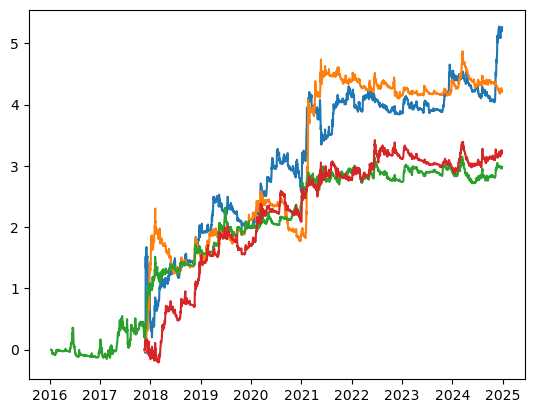

In [81]:
import matplotlib.pyplot as plt
plt.plot(signal_returns.cumsum())

6. How correlated are the timing strategies with the underlying assets?


In [82]:
signal_returns.corrwith(ret)

Ticker
ADA-USD    0.132667
BNB-USD    0.150267
BTC-USD   -0.110202
ETH-USD   -0.140779
dtype: float64

Not very